In [100]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer 
import wordcloud
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('survey.csv')

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [4]:
ds.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
for col in ds.columns:
    print (ds[col].unique())

['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' '

In [6]:
### seeing there are some strange ages like -1726, 329, 99999999999, -1, 8, 11, so organize age on value_count to dig in deeper. 
### when I look at it one of them (989) look a little bit weird while the person lives in the state LI and comes from the bahamas
## and (1127) is a bit weird because of the comment 'password: testered' and identief as 'p'. 
### (390) fills out 99999999999, Not_IMF and Zimbabwe and the rest is very unlikely
## While it are only 6 values out of 1259 (0.48%) I decide too drop them, 
## subsituting them with mean will give a weird value while there are 3 big numbers (-1726, 329, 99999999999) 

In [7]:
ds_cleaned_based_on_age = ds.drop([715, 143, 1127, 734, 989, 1090, 364, 390])

In [8]:
ds_cleaned_based_on_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1251 non-null object
Age                          1251 non-null int64
Gender                       1251 non-null object
Country                      1251 non-null object
state                        738 non-null object
self_employed                1233 non-null object
family_history               1251 non-null object
treatment                    1251 non-null object
work_interfere               989 non-null object
no_employees                 1251 non-null object
remote_work                  1251 non-null object
tech_company                 1251 non-null object
benefits                     1251 non-null object
care_options                 1251 non-null object
wellness_program             1251 non-null object
seek_help                    1251 non-null object
anonymity                    1251 non-null object
leave                        1251 non-null obj

In [9]:
ds_cleaned_based_on_age.shape

(1251, 27)

In [10]:
### interesting the 8 respondents that I filtered out had interference at work but no treatment.
ds_no_treatment_not_cleaned_set = ds.loc[ds["treatment"] != 'Yes']
ds_no_interference = ds_no_treatment_not_cleaned_set.loc[ds_no_treatment_not_cleaned_set["work_interfere"] != 'Never']
df_drop_na = ds_no_interference['work_interfere'].dropna()
df_drop_na.shape

(179,)

In [11]:
###Look at division between 1, 2 and 3rd world. 

WorldDict  = {'United States':'1st world', 'Canada':'1st world', 
                  'United Kingdom':'1st world', 'Bulgaria':'2nd world','France':'1st world', 
                  'Portugal':'1st world','Netherlands':'1st world', 'Switzerland':'1st world', 
                  'Australia':'1st world', 'Germany':'1st world', 'Russia':'2nd world',
                  'Mexico':'3rd world', 'Brazil':'3rd world','Slovenia':'2nd world',
                  'Costa Rica':'3rd world', 'Austria':'1st world', 'Ireland':'1st world',
                  'India':'3rd world', 'South Africa': '3rd world', 'Italy':'1st world',
                  'Sweden':'1st world', 'Colombia': '3rd world', 'Latvia': '2nd world',
                  'Romania': '2nd world','Belgium':'1st world', 'New Zealand':'1st world',
                  'Spain':'1st world', 'Finland':'1st world', 'Poland':'2nd world',
                  'Uruguay':'3rd world', 'Israel':'1st world','Bosnia and Herzegovina':'2nd world',
                  'Hungary':'2nd world', 'Singapore':'1st world', 'Japan':'1st world',
                  'Nigeria':'3rd world', 'Croatia':'2nd world', 'Norway':'1st world', 
                  'Thailand':'3rd world', 'Denmark':'1st world', 'Greece':'1st world',
                  'Moldova':'2nd world', 'Georgia':'2nd world', 'China':'2nd world', 
                  'Czech Republic':'2nd world', 'Philippines':'3rd world'}

In [12]:
ds_cleaned_based_on_age['World_Order'] = ds_cleaned_based_on_age['Country'].map(WorldDict) 
ds_cleaned_based_on_age

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,World_Order
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,1st world
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,1st world
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,1st world
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,1st world
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,1st world
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN,1st world
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,1st world
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,No,No,No,No,No,No,No,No,NaN,1st world
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN,1st world
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN,1st world


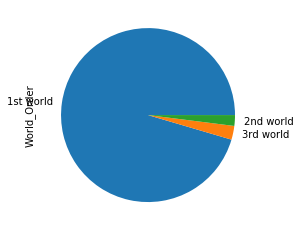

In [13]:
ds_cleaned_based_on_age.World_Order.value_counts().plot(kind='pie')

In [26]:
ds_cleaned_1st_world = ds_cleaned_based_on_age[ds_cleaned_based_on_age.World_Order == '1st world']
ds_cleaned_1st_world.shape

(1194, 28)

In [16]:
ds_cleaned_1st_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 1258
Data columns (total 28 columns):
Timestamp                    1194 non-null object
Age                          1194 non-null int64
Gender                       1194 non-null object
Country                      1194 non-null object
state                        736 non-null object
self_employed                1177 non-null object
family_history               1194 non-null object
treatment                    1194 non-null object
work_interfere               948 non-null object
no_employees                 1194 non-null object
remote_work                  1194 non-null object
tech_company                 1194 non-null object
benefits                     1194 non-null object
care_options                 1194 non-null object
wellness_program             1194 non-null object
seek_help                    1194 non-null object
anonymity                    1194 non-null object
leave                        1194 non-null obj

In [17]:
Not_Self_employed = ds_cleaned_1st_world[ds_cleaned_1st_world.self_employed == 'No']
Not_Self_employed.shape

(1049, 28)

In [18]:
Not_Self_employed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 20 to 1258
Data columns (total 28 columns):
Timestamp                    1049 non-null object
Age                          1049 non-null int64
Gender                       1049 non-null object
Country                      1049 non-null object
state                        673 non-null object
self_employed                1049 non-null object
family_history               1049 non-null object
treatment                    1049 non-null object
work_interfere               820 non-null object
no_employees                 1049 non-null object
remote_work                  1049 non-null object
tech_company                 1049 non-null object
benefits                     1049 non-null object
care_options                 1049 non-null object
wellness_program             1049 non-null object
seek_help                    1049 non-null object
anonymity                    1049 non-null object
leave                        1049 non-null ob

In [22]:
Not_Self_employed['Gender'] = Not_Self_employed['Gender'].str.lower()

C:\Users\eveli\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
for col in Not_Self_employed.columns:
    print (Not_Self_employed[col].unique())

['2014-08-27 11:35:12' '2014-08-27 11:35:48' '2014-08-27 11:36:24' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
[29 46 41 33 35 34 37 32 30 42 40 27 38 50 24 18 28 22 31 26 44 23 36 19
 25 45 39 43 21 56 60 54 55 48 20 57 58 47 62 51 49 53 72]
['male' 'female' 'm' 'male-ish' 'maile' 'trans-female' 'f' 'cis male'
 'male (cis)' 'queer/she/they' 'non-binary' 'femake' 'woman' 'make' 'enby'
 'fluid' 'genderqueer' 'female ' 'androgyne' 'agender' 'guy (-ish) ^_^'
 'male leaning androgynous' 'male ' 'man' 'trans woman' 'msle' 'neuter'
 'female (trans)' 'female (cis)' 'mail' 'malr' 'femail'
 'ostensibly male, unsure what that really means']
['United States' 'United Kingdom' 'Canada' 'Portugal' 'Netherlands'
 'Switzerland' 'France' 'Australia' 'Germany' 'Austria' 'Ireland' 'Sweden'
 'Belgium' 'New Zealand' 'Spain' 'Finland' 'Israel' 'Italy' 'Singapore'
 'Norway' 'Greece']
['NY' 'MA' 'IA' 'CA' 'TN' 'OH' nan 'WA' 'WI' 'IN' 'TX' 'MI' 'IL' 'UT' 'NM'
 'OR' 'FL' 'MN' 'MO' 'A

In [24]:
###organized the gender in 'Identiefy as male','Identiefy as female' and 'Does not identiefy as male or female'

Genders_s1 = Not_Self_employed.replace(['female'], 'IF').replace(['trans-female'], 'IF').replace(['cis female'], 'IF').replace(['f'], 'IF').replace(['woman'], 'IF').replace(['femake'], 'IF').replace(['cis-female/femme'], 'IF').replace(['trans woman'], 'IF').replace(['female (trans)'], 'IF').replace(['female (cis)'], 'IF').replace(['femail'], 'IF').replace(['female '], 'IF').replace(['cis-female/femme'], 'IF')
Genders_s2 = Genders_s1.replace(['enby'], 'Not_IMF').replace(['queer/she/they'], 'Not_IMF').replace(['non-binary'], 'Not_IMF').replace(['nah'], 'Not_IMF').replace(['all'], 'Not_IMF').replace(['fluid'], 'Not_IMF').replace(['genderqueer'], 'Not_IMF').replace(['androgyne'], 'Not_IMF').replace(['agender'], 'Not_IMF').replace(['neuter'], 'Not_IMF').replace(['queer'], 'Not_IMF').replace(['a little about you'], 'Not_IMF').replace(['p'], 'Not_IMF')
Genders_s3 = Genders_s2.replace(['m'], 'IM').replace(['male'], 'IM').replace(['maile'], 'IM').replace(['male-ish'], 'IM').replace(['something kinda male?'], 'IM').replace(['cis male'], 'IM').replace(['mal'], 'IM').replace(['male (cis)'], 'IM').replace(['make'], 'IM').replace(['guy (-ish) ^_^'], 'IM').replace(['male leaning androgynous'], 'IM').replace(['male '], 'IM').replace(['man'], 'IM').replace(['msle '], 'IM').replace(['mail'], 'IM').replace(['malr '], 'IM').replace(['cis man'], 'IM').replace(['ostensibly male, unsure what that really means'], 'IM').replace(['msle'], 'IM').replace(['malr'], 'IM')


In [27]:
#What is the division of the Genders?
Genders_s3.Gender.value_counts()

IM         820
IF         221
Not_IMF      8
Name: Gender, dtype: int64

In [29]:
Genders_s3['Age'].describe()

count    1049.000000
mean       32.045758
std         7.260541
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

In [43]:
Genders_s3['Age'].quantile([.05, .25, .5, .95])

0.05    23.0
0.25    27.0
0.50    31.0
0.95    45.0
Name: Age, dtype: float64

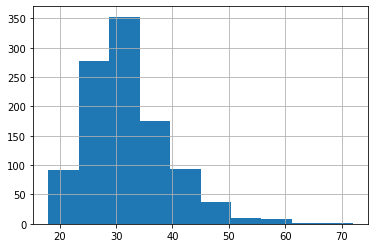

In [44]:
Genders_s3['Age'].hist()

In [82]:
comments = Not_Self_employed["comments"].tolist()
comments = [comment for comment in comments if str(comment) != 'nan']
comments = ''.join(comments)
comments = comments.lower().split()
comments

['relatively',
 'new',
 'job.',
 'ask',
 'again',
 'latersometimes',
 'i',
 'think',
 'about',
 'using',
 'drugs',
 'for',
 'my',
 'mental',
 'health',
 'issues.',
 'if',
 'i',
 'use',
 'drugs',
 'i',
 'feel',
 'betteri',
 'selected',
 'my',
 'current',
 'employer',
 'based',
 'on',
 'its',
 'policies',
 'about',
 'self',
 'care',
 'and',
 'the',
 'quality',
 'of',
 'their',
 'overall',
 'health',
 'and',
 'wellness',
 'benefits.',
 'i',
 'still',
 'have',
 'residual',
 'caution',
 'from',
 'previous',
 'employers',
 'who',
 'ranged',
 'from',
 'ambivalent',
 'to',
 'indifferent',
 'to',
 'actively',
 'hostile',
 'regarding',
 'mental',
 'health',
 'concerns.our',
 'health',
 'plan',
 'has',
 'covered',
 'my',
 'psychotherapy',
 'and',
 'my',
 'antidepressant',
 'medication.',
 'my',
 'manager',
 'has',
 'been',
 'aware',
 'but',
 'discreet',
 'throughout.',
 'i',
 'did',
 'get',
 'negative',
 'reviews',
 'when',
 'my',
 'depression',
 'was',
 'trashing',
 'my',
 'delivery',
 'but',
 "

In [84]:
stopwords = ["i'm", "'=='", ":d",'i\'ve',"main", 'my', "he", 'seem','-', "go", "&", 'are:','years', 'need', 'so', 'end','per', 'set','(eg','1-2','bit','15', '(or', '20','30','200','it:',"2012","(you", "…)",'a', 'about', 'as', 'on', 'after', 'all', 'also', 'always', 'am', 'an', 'and', 'any', 'are', 'at', 'be', 'been', 'being', 'but', 'by', 'came', 'can', 'cant', 'come', 'could', 'did', "didn't", 'do', 'does', "doesn't",'doing', "don't", 'else', 'for', 'from', 'get', 'give', 'goes', 'going', 'had', 'happen', 'has', 'have', 'having', 'how', 'i', 'if', 'ill', "i'll", "i'm",'in', 'into', 'is', "isn't", 'it', 'its', "it's", "I've", 'just', 'keep', 'let', 'like', 'made', 'make', 'many', 'may', 'me', "mean", "more", "mean", "more", "most", "much", "no", "not", "now", "of", "only", "or", "our", "really", "say", "see", "some", "something", "most", "much", "no", "not", "now", "of", "only", "or", "our", "really", "say", "see", "some", "something", "take", "tell", "than", "that", "the", "their", "them", "then", "they", "thing", "this", "to", "try", "up", "us", "use", "used", "uses", "very", "want", "was", "way", "we", "what", "when", "where", "which", "who", "why", "will", "with", "without", "wont", "you", "your", "you're"]

In [85]:
for s in stopwords:
    for i in comments:    
        if i == s:
            comments.remove(i)
            
comments

['relatively',
 'new',
 'job.',
 'ask',
 'again',
 'latersometimes',
 'think',
 'using',
 'drugs',
 'mental',
 'health',
 'issues.',
 'drugs',
 'feel',
 'betteri',
 'selected',
 'current',
 'employer',
 'based',
 'policies',
 'self',
 'care',
 'quality',
 'overall',
 'health',
 'wellness',
 'benefits.',
 'still',
 'residual',
 'caution',
 'previous',
 'employers',
 'ranged',
 'ambivalent',
 'indifferent',
 'actively',
 'hostile',
 'regarding',
 'mental',
 'health',
 'concerns.our',
 'health',
 'plan',
 'covered',
 'psychotherapy',
 'antidepressant',
 'medication.',
 'manager',
 'aware',
 'discreet',
 'throughout.',
 'negative',
 'reviews',
 'depression',
 'trashing',
 'delivery',
 "y'know",
 "wasn't",
 'delivering.i',
 'started',
 'new',
 'job',
 'last',
 'week',
 'hence',
 'lot',
 "know'sin",
 'addition',
 'own',
 'mental',
 'health',
 'issues',
 'known',
 'several',
 'coworkers',
 'suffering',
 'know',
 'empathize',
 'help.thanks',
 'research.in',
 'previous',
 'workplace',
 'mental'

In [87]:
bag_of_words= {k:comments.count(k) for k in set(comments)}
bag_of_words_sorted = sorted(bag_of_words.items(), key=lambda kv: kv[1], reverse=True)
bag_of_words_sorted


[('health', 94),
 ('mental', 87),
 ('work', 39),
 ('would', 30),
 ('employer', 28),
 ('issues', 26),
 ('people', 23),
 ('know', 21),
 ('company', 21),
 ('because', 20),
 ('out', 16),
 ('feel', 16),
 ('depression', 14),
 ('insurance', 13),
 ('small', 13),
 ('family', 13),
 ('job', 13),
 ('issue', 12),
 ('even', 12),
 ('coworkers', 11),
 ('negative', 11),
 ('time', 11),
 ('seen', 10),
 ('never', 10),
 ('might', 10),
 ('other', 10),
 ('tech', 10),
 ('problems', 9),
 ('too', 9),
 ('myself', 9),
 ('leave', 8),
 ('employers', 8),
 ('help', 8),
 ('physical', 8),
 ('manager', 8),
 ('months', 8),
 ('questions', 8),
 ('one', 8),
 ('care', 8),
 ('those', 7),
 ('there', 7),
 ('anxiety', 7),
 ('off', 7),
 ('discuss', 7),
 ('workplace', 7),
 ('same', 7),
 ('think', 7),
 ('working', 7),
 ('back', 7),
 ("haven't", 7),
 ('while', 7),
 ('worse', 7),
 ('previous', 7),
 ('illness', 7),
 ('support', 6),
 ('things', 6),
 ('it.', 6),
 ('open', 6),
 ('understand', 6),
 ('covered', 6),
 ('state', 6),
 ('employ

In [86]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(comments)
X_train_counts.shape 

(2957, 1283)

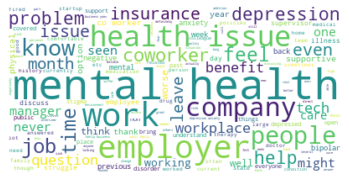

In [89]:
cloud = ' '.join(comments)
wordcloud = wordcloud.WordCloud(max_font_size = 50, max_words = 150, background_color = 'white').generate(cloud)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [49]:
ds_adjust_01 = Genders_s3[['family_history', 'treatment', 'remote_work',
                                     'tech_company', 'obs_consequence']]
ds_01 = ds_adjust_01.applymap(lambda x: 1 if x == 'Yes' else 0)


In [77]:
ds_01_to_analyse = ds_01[['family_history', 'treatment']]


In [78]:
ds_01_to_analyse.corr(method='pearson')

,family_history,treatment
family_history,1.000000,0.379022
treatment,0.379022,1.000000


In [74]:
ds_adjust_012 = Genders_s3[['benefits', 'care_options', 'wellness_program', 'seek_help', 'mental_vs_physical',
                                     'mental_health_consequence', 'phys_health_consequence',
                                    'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                                    ]]
ds_012_test = ds_adjust_012.applymap(lambda x: 1 if x == 'Yes' else 0) 

In [75]:
ds_012_test.corr(method='pearson')

,benefits,care_options,wellness_program,seek_help,mental_vs_physical,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview
benefits,1.000000,0.480524,0.436872,0.470568,0.133374,-0.037249,-0.017877,-0.008044,0.020693,-0.022474,-0.056208
care_options,0.480524,1.000000,0.324569,0.367846,0.121794,0.018593,-0.005862,0.030706,0.059731,0.015954,-0.006548
wellness_program,0.436872,0.324569,1.000000,0.583247,0.212600,-0.021372,-0.038076,0.007013,0.090407,0.009122,-0.037873
seek_help,0.470568,0.367846,0.583247,1.000000,0.228489,-0.054515,-0.035223,0.028246,0.106997,0.043599,0.013283
mental_vs_physical,0.133374,0.121794,0.212600,0.228489,1.000000,-0.255473,-0.084820,0.207933,0.298481,0.067506,0.061162
mental_health_consequence,-0.037249,0.018593,-0.021372,-0.054515,-0.255473,1.000000,0.344140,-0.209116,-0.353000,-0.078226,-0.028718
phys_health_consequence,-0.017877,-0.005862,-0.038076,-0.035223,-0.084820,0.344140,1.000000,-0.090128,-0.166551,-0.003652,-0.086320
coworkers,-0.008044,0.030706,0.007013,0.028246,0.207933,-0.209116,-0.090128,1.000000,0.425221,0.183105,0.137321
supervisor,0.020693,0.059731,0.090407,0.106997,0.298481,-0.353000,-0.166551,0.425221,1.000000,0.118534,0.105788
mental_health_interview,-0.022474,0.015954,0.009122,0.043599,0.067506,-0.078226,-0.003652,0.183105,0.118534,1.000000,0.358813


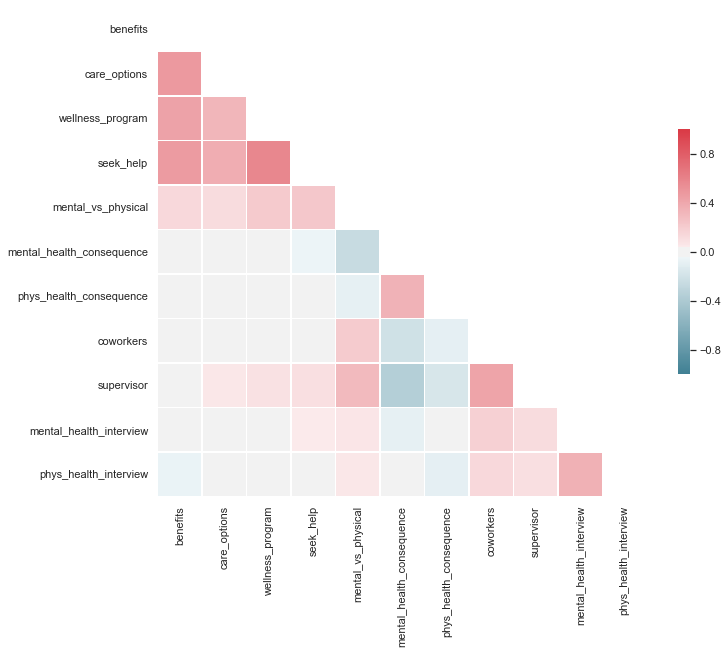

In [76]:
sns.set(style="white")

corr = ds_012_test.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [96]:
### filter out everyone who had treatment, drop everyone who has to trouble with mental health while working.
### drop all NaN, they didn't or need to awnser the questions. 
### look for size of this list, 139 people out of all respondents (1049). Has mental issues that 
### block them from working without treatment which is 13,3% of this sample. 
ds_no_treatment = Not_Self_employed.loc[Not_Self_employed["treatment"] != 'Yes']
df_drop_na = ds_no_treatment['work_interfere'].dropna()
ds_interference = df_drop_na.loc[Not_Self_employed["work_interfere"] != 'Never']
ds_interference.shape

(139,)

In [98]:
139/1049*100

13.250714966634892

(150,)